In [4]:
# Step1: Define the State Object
from pydantic import BaseModel
from typing import Annotated
from langgraph.graph import add_messages
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [8]:
#Step2: Start the Graph Builder with the State Class
from langgraph.graph import StateGraph
graph_builder = StateGraph(State)

In [9]:
#Step3: Create a Node
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    messages = [{"role": "assistant", "content": response.content}]
    new_state = State(messages=messages)
    return new_state

graph_builder.add_node("Chatbot", chatbot_node)

In [11]:
#Step4: Create Edges
from langgraph.graph import START, END
graph_builder.add_edge(START, "Chatbot")
graph_builder.add_edge("Chatbot", END)

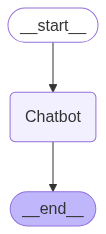

In [13]:
#Step5: Compile the Graph
from IPython.display import Image
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
import gradio as gr
def chat(user_input: str, history):
    initial_state = State(messages=[{"role":"user", "content": user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result['messages'][-1].content

gr.ChatInterface(chat, type="messages").launch()

d:\Jeevan\Agentic_AI\LangGraph_Langchain\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={}, id='8a6e8e8c-40c5-4bf7-b29d-4cb62a7fbd36'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}, id='d808e6e6-0f9c-44a0-b672-57c9799d2b19')]}
{'messages': [HumanMessage(content='what is 2*2?', additional_kwargs={}, response_metadata={}, id='82c07961-b449-42c6-ace0-3a964834b50e'), AIMessage(content='2 multiplied by 2 equals 4.', additional_kwargs={}, response_metadata={}, id='6a6eb07c-ef50-4a89-9e30-1067bcdee8ea')]}
